In [16]:
import pandas as pd
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

In [5]:
nameSample = pd.read_excel('firstNameTest.xlsx')
nameSample.head()

,HubFirstName,LolaFirstName
0,Cherri,Cheri
1,Bob,Robert
2,Steve,Steven
3,Kathryn,Kathy
4,Kimberly,Kim


### Method 1: Ratio()

This method works fine for short string(eg. A single word) and very long strings (eg: full book)
, but not for 3-10 word labels. 

In [6]:
def get_ratio(df):
    hubName = df['HubFirstName']
    lolaName = df['LolaFirstName']
    return fuzz.ratio(hubName,lolaName)

nameSample['ratioScore'] = nameSample.apply(get_ratio, axis=1)

### Method 2: partial_ratio()

This method takes in the shortest string, which in this case is "Catherine Gitau", 
then matches it with all the sub-strings of length in "Catherine M. Gitau". 
This is more like the 'LIKE' operator in SQL


In [7]:
def get_partial_ratio(df):
    hubName = df['HubFirstName']
    lolaName = df['LolaFirstName']
    return fuzz.partial_ratio(hubName,lolaName)

nameSample['partialRatioScore'] = nameSample.apply(get_partial_ratio, axis=1)

### Method 3: get_token_sort_ratio()

The method ignore the order to compare the similarity of two strings

In [8]:
def get_token_sort_ratio(df):
    hubName = df['HubFirstName']
    lolaName = df['LolaFirstName']
    return fuzz.token_sort_ratio(hubName,lolaName)

nameSample['tokenSortRatioScore'] = nameSample.apply(get_token_sort_ratio,axis=1)

### Method 4: get_token_set_ratio()

This approach ignore the order. It also tokenize both strings. But instead of sorting and comparing immediately, we split the tokens into two groups. Group 1: Intersection --- Tokens that are common to both strings. Group 2: Remainder -- the left tokens

The intuition here is that the intersection part is always exactly the same, the scores increase when that makes up a larger percentage of the full string, and the string remainders are more similar.

This method also remove all the duplicated tokens.

In [9]:
def get_token_set_ratio(df):
    hubName = df['HubFirstName']
    lolaName = df['LolaFirstName']
    return fuzz.token_set_ratio(hubName, lolaName)

nameSample['tokenSetRatioScore'] = nameSample.apply(get_token_set_ratio, axis=1)

### Method 5: 

This function checks if two names are exactly the same.

In [10]:
def if_same(df):
    hubName = df['HubFirstName']
    lolaName = df['LolaFirstName']
    if hubName == lolaName:
        result ='Same'
    else:
        result ='Not Same'
    return result

nameSample['sameOrNot'] = nameSample.apply(if_same,axis=1)

### Method 6: Get the final result

In [46]:
def get_result_output(df):
    ratioScore = df['ratioScore']
    partialRatioScore = df['partialRatioScore']
    tokenSortRatioScore = df['tokenSortRatioScore']
    tokenSetRatioScore = df['tokenSetRatioScore']
    checkifsame = df['sameOrNot']
    final_result =''
    if checkifsame == 'Same':
        final_result = 'Same Names'
    else:
        if partialRatioScore ==100:
            final_result ='Names Been Cut or Fully Spelled Out'
        elif partialRatioScore !=100 and ratioScore>80:
            final_result = 'Minor Typo'
        else:
            final_result ='Do Not Match'

    return final_result

nameSample['Match Category'] = nameSample.apply(get_result_output,axis =1)

In [47]:
nameSample.head(10)

,HubFirstName,LolaFirstName,ratioScore,partialRatioScore,tokenSortRatioScore,tokenSetRatioScore,sameOrNot,Match Category
0,Cherri,Cheri,91,80,91,91,Not Same,Minor Typo
1,Bob,Robert,44,67,44,44,Not Same,Do Not Match
2,Steve,Steven,91,100,91,91,Not Same,Names Been Cut or Fully Spelled Out
3,Kathryn,Kathy,83,80,83,83,Not Same,Minor Typo
4,Kimberly,Kim,55,100,55,55,Not Same,Names Been Cut or Fully Spelled Out
5,Juan Carlos,Juancarlos,86,80,57,57,Not Same,Minor Typo
6,Paul David,Paul,57,100,57,100,Not Same,Names Been Cut or Fully Spelled Out
7,Alon,Al,67,100,67,67,Not Same,Names Been Cut or Fully Spelled Out
8,Charla,Charlanda,80,100,80,80,Not Same,Names Been Cut or Fully Spelled Out
9,Christiaan,Chris,67,100,67,67,Not Same,Names Been Cut or Fully Spelled Out


### Export the dataframe to excel file

In [ ]:
export_excel = nameSample.to_excel(r"C:\Users\nwang\Untitled Folder\StringSimilarityCheck\firstNameTest.xlsx",sheet_name='Sheet2',index=None, header=True)

### Analyze the result in Python


#### Step 1:  The total count of rows in the dataframe

In [13]:
count_row = nameSample.shape[0]
count_row

996

#### Step 2:  Check the count of each category

In [48]:
group_count = nameSample['Match Category'].groupby(nameSample['Match Category']).count().reset_index(name="count")
group_count_order = group_count.sort_values(by='count')
group_count_order.set_index('Match Category',inplace=True)
group_count_order

,count
Match Category,
Same Names,17
Minor Typo,96
Do Not Match,372
Names Been Cut or Fully Spelled Out,511


In [57]:
group_count_order['count']

Match Category
Same Names                              17
Minor Typo                              96
Do Not Match                           372
Names Been Cut or Fully Spelled Out    511
Name: count, dtype: int64

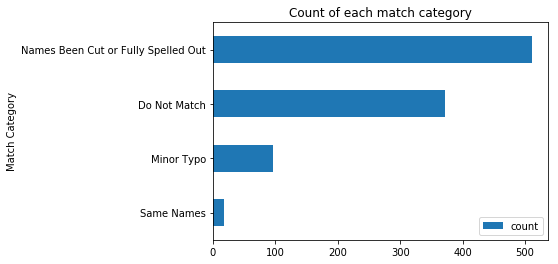

In [49]:
group_count_order.plot(kind='barh',title='Count of each match category')
plt.show()

#### Step 3: Check the percentage of each category

In [65]:
group_count_order['Percentage'] = round((group_count_order['count']/count_row)*100, 2)
group_count_order

,count,Percentage
Match Category,,
Same Names,17,1.71
Minor Typo,96,9.64
Do Not Match,372,37.35
Names Been Cut or Fully Spelled Out,511,51.31
